<a href="https://colab.research.google.com/github/sheebajosetj/Machine-Learning-/blob/main/Machine_Learning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


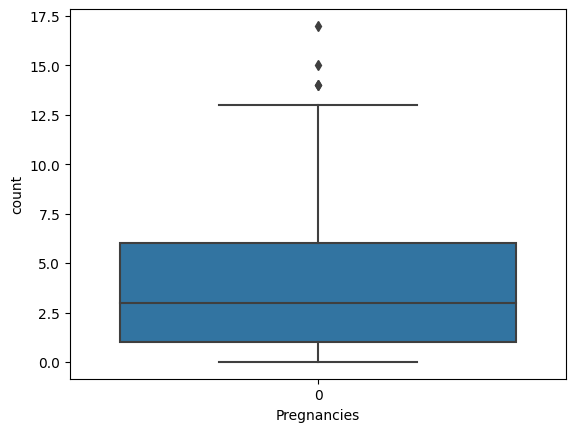

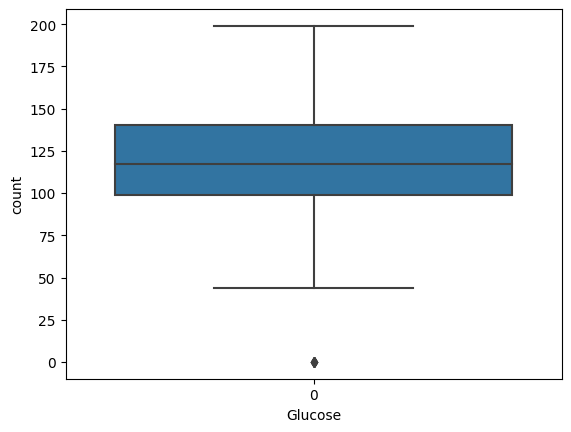

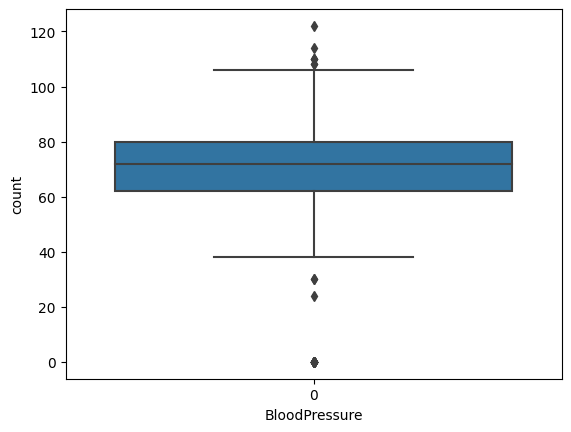

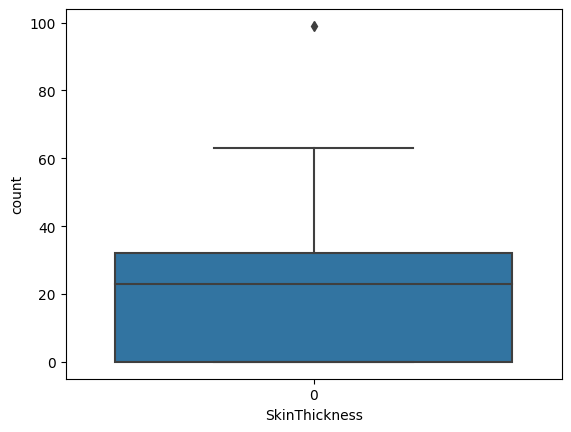

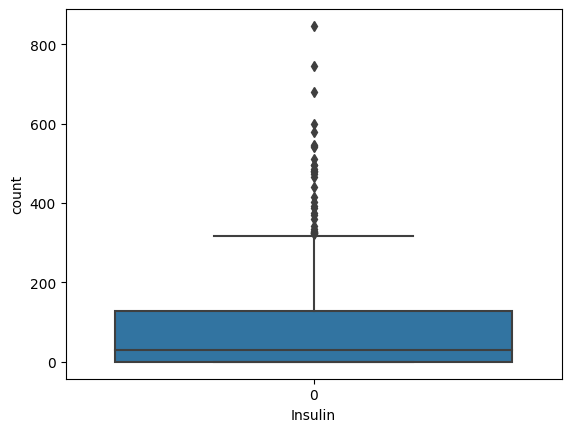

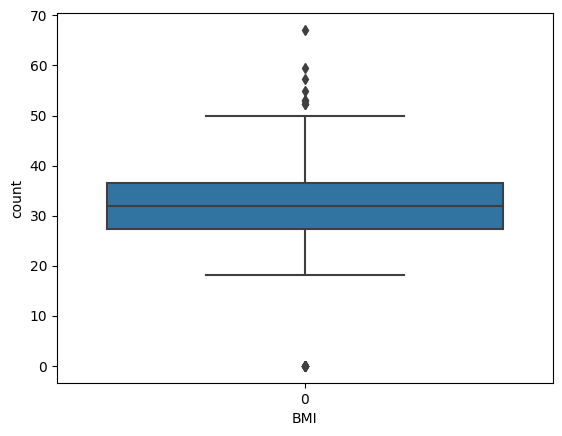

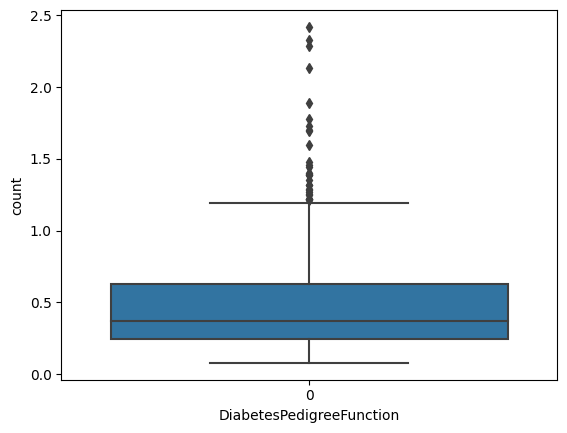

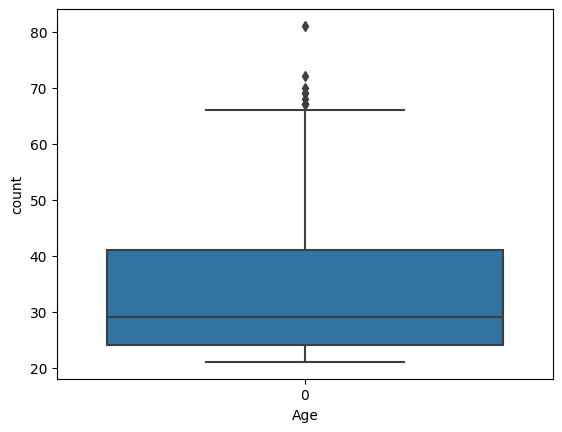

In [ ]:
# Glucose
# gluc_1 -> 25th percentile
# gluc_2 -> 75th percentile

# [gluc_1 - 1.5*(gluc_2 - gluc_1), gluc_2 + 1.5*(gluc_2 - gluc_1)] -> Points which are not between this range we call them as outliers
import seaborn as sns
import matplotlib.pyplot as plt
col=list(df.drop("Outcome", axis=1).columns) #Creates a list named 'col' that contains the names of all the columns in the DataFrame 'df'
for col_name in col: #This loop iterates through each column name in the 'col' list.
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'): #checks if the data type of the current
                                                                          # column is either 'int64' or 'float64'.
        sns.boxplot(df[col_name]) #Creates a box plot for all the column 'col_name' from the DataFrame.
        plt.xlabel(col_name) # sets the x-axis label
        plt.ylabel('count') #  sets the y-axis label
        plt.show() # This displays the box plot for all the column

In [ ]:
X = df.drop(columns = 'Outcome', axis =1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state = 6)

In [ ]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(max_iter = 100,  C=0.1) # model parameters
Log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
y_pred = Log_reg.predict(X_test)
y_proba = Log_reg.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[132,  21],
       [ 31,  47]])

In [ ]:
# 122 -> non diabetic patients predicted correctly
# 27 -> diabetic patiests predicted correctly
# 27 -> diabetic patients who were predicted to be non diabetic
# 15 -> non diabetic patients who were predicted to be diabetic

In [ ]:
27/(27+27)

0.5

In [ ]:
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
print("Precision: {} \nRecall: {}".format(p, r))

Precision: 0.6911764705882353 
Recall: 0.6025641025641025


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)
# (2*p*r)/(p+r)

0.6438356164383562

In [ ]:
from sklearn.metrics import accuracy_score
# Correct Predictions by the model
# (True Positive + True Negative)/(True Positive + True Negative + False Positive + False Negative)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
((0.82*137) + (0.64*54))/191

0.7691099476439789

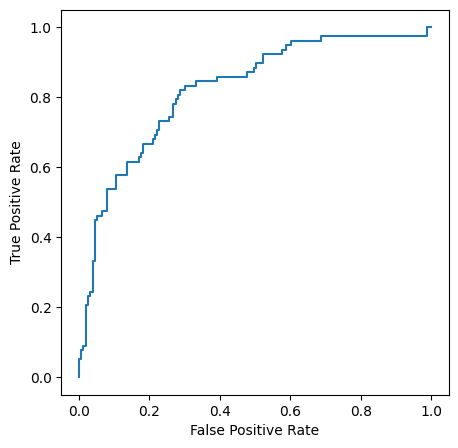

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt


def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)

plot_sklearn_roc_curve(y_test, y_proba[:, 1])

In [ ]:
from sklearn.metrics import roc_auc_score
print('Area Under the ROC: {}\n\n'.format(roc_auc_score(y_test, y_proba[:, 1])))

Area Under the ROC: 0.8217697335344394


